In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from models import reina2016
import utils as u
import pandas as pd
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "H25"

In [3]:
preprocess(abbr)
strack_df = reina2016.reina2016(abbr)


H25
Primary topic : elec
H25 : Exported merged CSV in data/runs/H25/merged/H25_2023_04_19-18_54_37-AG-grandaxe11_m.csv
H25 : Exported cut CSV in data/runs/H25/merged/H25_2023_04_19-18_54_37-AG-grandaxe11_mc.csv
Constant columns : 11
/status/time
/status/battery/total
/imu_and_wheel_odom/lin_twi/y
/imu_and_wheel_odom/lin_twi/z
/imu_and_wheel_odom/ang_twi/x
/imu_and_wheel_odom/ang_twi/y
/imu_and_wheel_odom/ang_twi/z
/husky_velocity_controller/cmd_vel_unstamped/linear/y
/husky_velocity_controller/cmd_vel_unstamped/linear/z
/husky_velocity_controller/cmd_vel_unstamped/angular/x
/husky_velocity_controller/cmd_vel_unstamped/angular/y
H25 : Exported filt CSV in data/runs/H25/merged/H25_2023_04_19-18_54_37-AG-grandaxe11_mcf.csv


In [4]:
strack_df.columns.values

array(['time', 'time_rel', 'vx', 'vy', 'vz', 'px', 'py', 'pz', 'psi',
       'theta', 'phi', 'wz', 'ax', 'ay', 'az', 'qw', 'qx', 'qy', 'qz',
       'cmd_v', 'cmd_w', 'wL', 'wR', 'voltage', 'V_L', 'V_R',
       'current_cpu', 'I_L', 'I_R', 'ax_corr', 'ay_corr', 'az_corr', 'v',
       'a', 'vL', 'vR', 'deltaV', 'Bs_naive', 'cmd_vL', 'cmd_vR', 'PE_L',
       'PE_R', 'Tmot_L', 'Tmot_R', 'TL', 'TR', 'PM_L', 'PM_R',
       'P_logical', 'P_motion', 'PE_motion', 'P_total', 'ICRx', 'ICRy',
       'ICRyL', 'ICRyR', 'Bs', 'R', 'Fz1', 'Fz2', 'Fz3', 'Fz4'],
      dtype=object)

Text(0, 0.5, 'Velocity difference [m/s]')

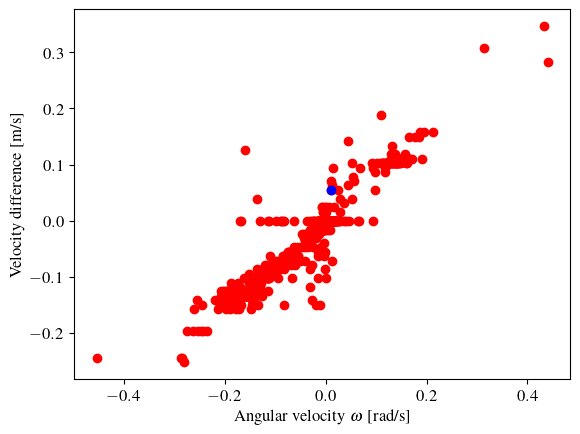

In [5]:
fig, ax = plt.subplots()
ax.plot(strack_df.wz, strack_df.deltaV, "ro")
ax.plot(strack_df.wz.iloc[-1], strack_df.deltaV.iloc[-1], "bo")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Velocity difference [m/s]")

<AxesSubplot: >

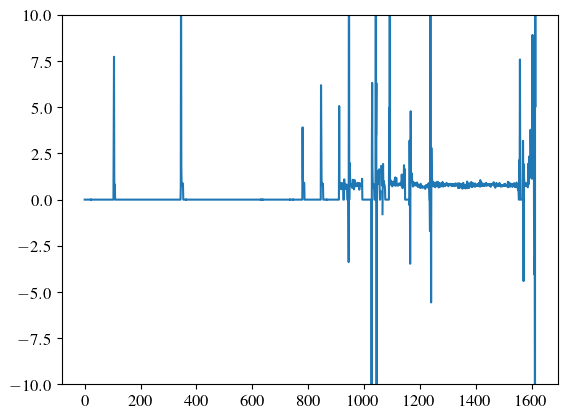

In [6]:
strack_df.Bs_naive.plot(ylim=(-10,10))

<AxesSubplot: >

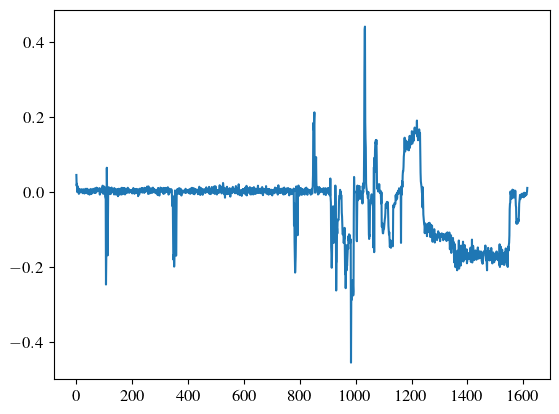

In [7]:
strack_df.wz.plot()

<AxesSubplot: >

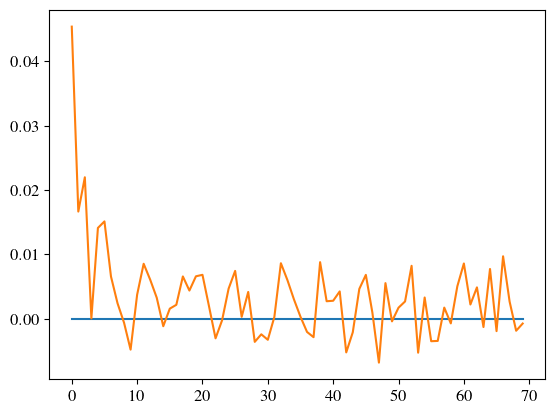

In [8]:
fig, ax = plt.subplots()
strack_df.iloc[:70].cmd_w.plot(ax=ax)
strack_df.iloc[:70].wz.plot(ax=ax)
